In [88]:
# Carrega bibliotecas (nltk é a essencial aqui)
import nltk
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [89]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [91]:
# Carregar arquivo texto
# Alterei o código para uma maneira melhor para ler o arquivo
with open('maconha.txt','r') as f:
    texto = ""
    while 1:
        line = f.readline()
        if not line:
            break
        texto += line

In [92]:
print(texto)

A cada dia que passa, mais se fala sobre a legalização da maconha. Seja nas escolas, nos jornais ou no campo político, o assunto já não é mais tabu e defender a descriminalização ou legalização não é nem de longe uma opinião polêmica. Até mesmo num país conservador como o nosso, já encontramos uma parcela da população sendo favorável à legalização tanto para fins medicinais, quanto para fins recreacionais. Com isto, muitos começam a criar hipóteses de coisas terríveis que poderiam acontecer no Brasil, caso a lei sofra mudanças. O curioso por trás disso é que ainda há muita gente que debate em torno de suposições e crenças do que poderia acontecer, ignorando completamente os experimentos existentes.

O porte de maconha já é descriminalizado em diversos lugares do mundo [1], além de ter seu uso para fins medicinais e até recreacionais sendo cada vez mais permitidos. Na América do Sul, por exemplo, países como Chile, Argentina e Colômbia já não criminalizam mais o porte da droga. Além dis

In [93]:
# Quebra em palavras
tokenized_word=word_tokenize(texto)
print(tokenized_word)

['A', 'cada', 'dia', 'que', 'passa', ',', 'mais', 'se', 'fala', 'sobre', 'a', 'legalização', 'da', 'maconha', '.', 'Seja', 'nas', 'escolas', ',', 'nos', 'jornais', 'ou', 'no', 'campo', 'político', ',', 'o', 'assunto', 'já', 'não', 'é', 'mais', 'tabu', 'e', 'defender', 'a', 'descriminalização', 'ou', 'legalização', 'não', 'é', 'nem', 'de', 'longe', 'uma', 'opinião', 'polêmica', '.', 'Até', 'mesmo', 'num', 'país', 'conservador', 'como', 'o', 'nosso', ',', 'já', 'encontramos', 'uma', 'parcela', 'da', 'população', 'sendo', 'favorável', 'à', 'legalização', 'tanto', 'para', 'fins', 'medicinais', ',', 'quanto', 'para', 'fins', 'recreacionais', '.', 'Com', 'isto', ',', 'muitos', 'começam', 'a', 'criar', 'hipóteses', 'de', 'coisas', 'terríveis', 'que', 'poderiam', 'acontecer', 'no', 'Brasil', ',', 'caso', 'a', 'lei', 'sofra', 'mudanças', '.', 'O', 'curioso', 'por', 'trás', 'disso', 'é', 'que', 'ainda', 'há', 'muita', 'gente', 'que', 'debate', 'em', 'torno', 'de', 'suposições', 'e', 'crenças', '

In [94]:
# Palavras em letras minusculas
tokenized_word_2 = [w.lower() for w in tokenized_word]
print(tokenized_word_2)

['a', 'cada', 'dia', 'que', 'passa', ',', 'mais', 'se', 'fala', 'sobre', 'a', 'legalização', 'da', 'maconha', '.', 'seja', 'nas', 'escolas', ',', 'nos', 'jornais', 'ou', 'no', 'campo', 'político', ',', 'o', 'assunto', 'já', 'não', 'é', 'mais', 'tabu', 'e', 'defender', 'a', 'descriminalização', 'ou', 'legalização', 'não', 'é', 'nem', 'de', 'longe', 'uma', 'opinião', 'polêmica', '.', 'até', 'mesmo', 'num', 'país', 'conservador', 'como', 'o', 'nosso', ',', 'já', 'encontramos', 'uma', 'parcela', 'da', 'população', 'sendo', 'favorável', 'à', 'legalização', 'tanto', 'para', 'fins', 'medicinais', ',', 'quanto', 'para', 'fins', 'recreacionais', '.', 'com', 'isto', ',', 'muitos', 'começam', 'a', 'criar', 'hipóteses', 'de', 'coisas', 'terríveis', 'que', 'poderiam', 'acontecer', 'no', 'brasil', ',', 'caso', 'a', 'lei', 'sofra', 'mudanças', '.', 'o', 'curioso', 'por', 'trás', 'disso', 'é', 'que', 'ainda', 'há', 'muita', 'gente', 'que', 'debate', 'em', 'torno', 'de', 'suposições', 'e', 'crenças', '

In [95]:
# Aqui, vamos retirar as chamadas stopwords (conjuncoes, preposicoes, palavras que não nos interessam)
# 1) Vamos ver quais stopwords ja existem na biblioteca
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words("portuguese"))

In [96]:
print(stop_words)

{'sua', 'fomos', 'você', 'minha', 'teu', 'houvessem', 'tiverem', 'teríamos', 'esteve', 'nosso', 'estão', 'tenham', 'houver', 'na', 'da', 'te', 'houvéssemos', 'houveríamos', 'tivessem', 'houvermos', 'houveriam', 'se', 'mas', 'tivemos', 'houverei', 'estava', 'lhe', 'tenhamos', 'houvera', 'ou', 'fui', 'das', 'mais', 'só', 'fora', 'ele', 'já', 'ela', 'esse', 'tu', 'sejam', 'meu', 'hei', 'tivéramos', 'pelo', 'estivesse', 'sejamos', 'serei', 'seus', 'estiver', 'hajamos', 'estas', 'tém', 'houveria', 'tínhamos', 'houve', 'as', 'a', 'muito', 'depois', 'esses', 'estivessem', 'o', 'estivéramos', 'este', 'tua', 'houverem', 'seria', 'teus', 'tiver', 'num', 'houverá', 'os', 'mesmo', 'não', 'de', 'como', 'estejam', 'hão', 'estes', 'terão', 'serão', 'tuas', 'eu', 'dele', 'tivermos', 'foram', 'estávamos', 'elas', 'minhas', 'seu', 'fôramos', 'estavam', 'teve', 'sem', 'temos', 'me', 'for', 'estivera', 'estivéssemos', 'nem', 'delas', 'haja', 'quem', 'no', 'é', 'até', 'tiveram', 'havemos', 'éramos', 'um', 

In [97]:
# 2) Vamos adicionar novas stopwords
# coloquei o 'bbbbbbbbbbb' porque ficava mais facil pra ver se deu certo a lista de stopwords depois
stop_words.update(('uso',',',';','%','.',':','bbbbbbbbbbbbbbb','-','droga','drogas','art.','–','http'))
#print(stop_words)

In [98]:
# 2) Remover essas stopwords
tokenized_word_3=[]
for w in tokenized_word_2:
    if w not in stop_words:
        tokenized_word_3.append(w)

In [99]:
# se quiser comparar o antes e depois da remoção das stopwords
#print("Tokenized Word:",tokenized_word)
#print("Filterd Word:",tokenized_word_3)

In [100]:
# Analisa distribuicao das palavras
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word_3)
fdist.most_common(20)

[('legalização', 13),
 ('maconha', 8),
 ('ainda', 7),
 ('[', 7),
 ('fins', 6),
 (']', 6),
 ('além', 6),
 ("''", 6),
 ('medicinais', 4),
 ('disso', 4),
 ('sendo', 3),
 ('recreacionais', 3),
 ('acontecer', 3),
 ('brasil', 3),
 ('lei', 3),
 ('mudanças', 3),
 ('porte', 3),
 ('pode', 3),
 ('quantidade', 3),
 ('estudos', 3)]

# Grafico de distribuicao das palavras
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

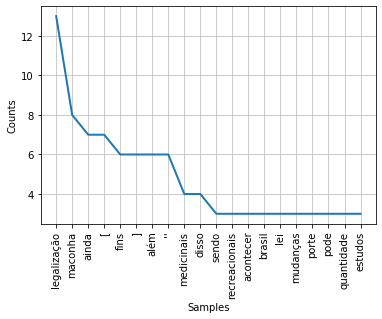

In [101]:
import matplotlib.pyplot as plt
plt.figure()
fdist.plot(20,cumulative=False)

In [108]:
# Wordcloud
wc = WordCloud()
img = wc.generate_from_text(' '.join(tokenized_word_3))
img.to_file('worcloud.jpeg')

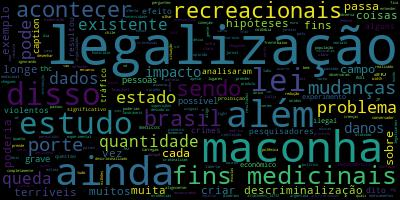

In [110]:
from IPython.display import Image
Image(filename='worcloud.jpeg')